In [83]:
# import public packages
import os
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.patches import Rectangle
import scipy
import mne
import sys

from mne.time_frequency import tfr_morlet
from mne.baseline import rescale
from scipy.signal import spectrogram, hann, butter, filtfilt, hilbert
from scipy import signal, interpolate, stats
from scipy.interpolate import make_interp_spline, BSpline
from io import open
from importlib import reload

# import own functions
from utils import find_folders
import dat_preproc
import fix_annot_onsets
import mat2fif
import baseline_correction
import normalization
import power_spectrum

### Add Directories/ Load Files

In [84]:
reload(find_folders)
onedrive = find_folders.get_onedrive_path()
project_path = find_folders.get_onedrive_path("entrainment")
print(project_path)

C:Users\mathiopv\OneDrive - Charité - Universitätsmedizin Berlin\ENTRAINMENT_PROJECT


In [ ]:
percept_ID = 'sub050'
fname = 'sub-20220413PStn_ses-2023053101280985_run-BrainSense20230531025500.mat'

raw = mne.io.read_raw_fieldtrip(
    os.path.join(
        project_path,
        'data',
        'with_med_FTG',
        'Sub009',
        fname
    ),
    info = None
)

subID = 'Sub009'

In [85]:
raw = mne.io.read_raw_fif(os.path.join(
    project_path,
        'data',
        'Fifs',
        'without_med_FTG',
        'Sub028_FIF.fif'
    )
)

subID = 'Sub028'

Opening raw data file C:Users\mathiopv\OneDrive - Charité - Universitätsmedizin Berlin\ENTRAINMENT_PROJECT\data\Fifs\without_med_FTG\Sub028_FIF.fif...
    Reading extended channel information
    Range : 0 ... 251186 =      0.000 ...  1004.744 secs
Ready.


C:\Users\mathiopv\AppData\Local\Temp\ipykernel_8284\2188571113.py:1: RuntimeWarning: This filename (C:Users\mathiopv\OneDrive - Charité - Universitätsmedizin Berlin\ENTRAINMENT_PROJECT\data\Fifs\without_med_FTG\Sub028_FIF.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(os.path.join(


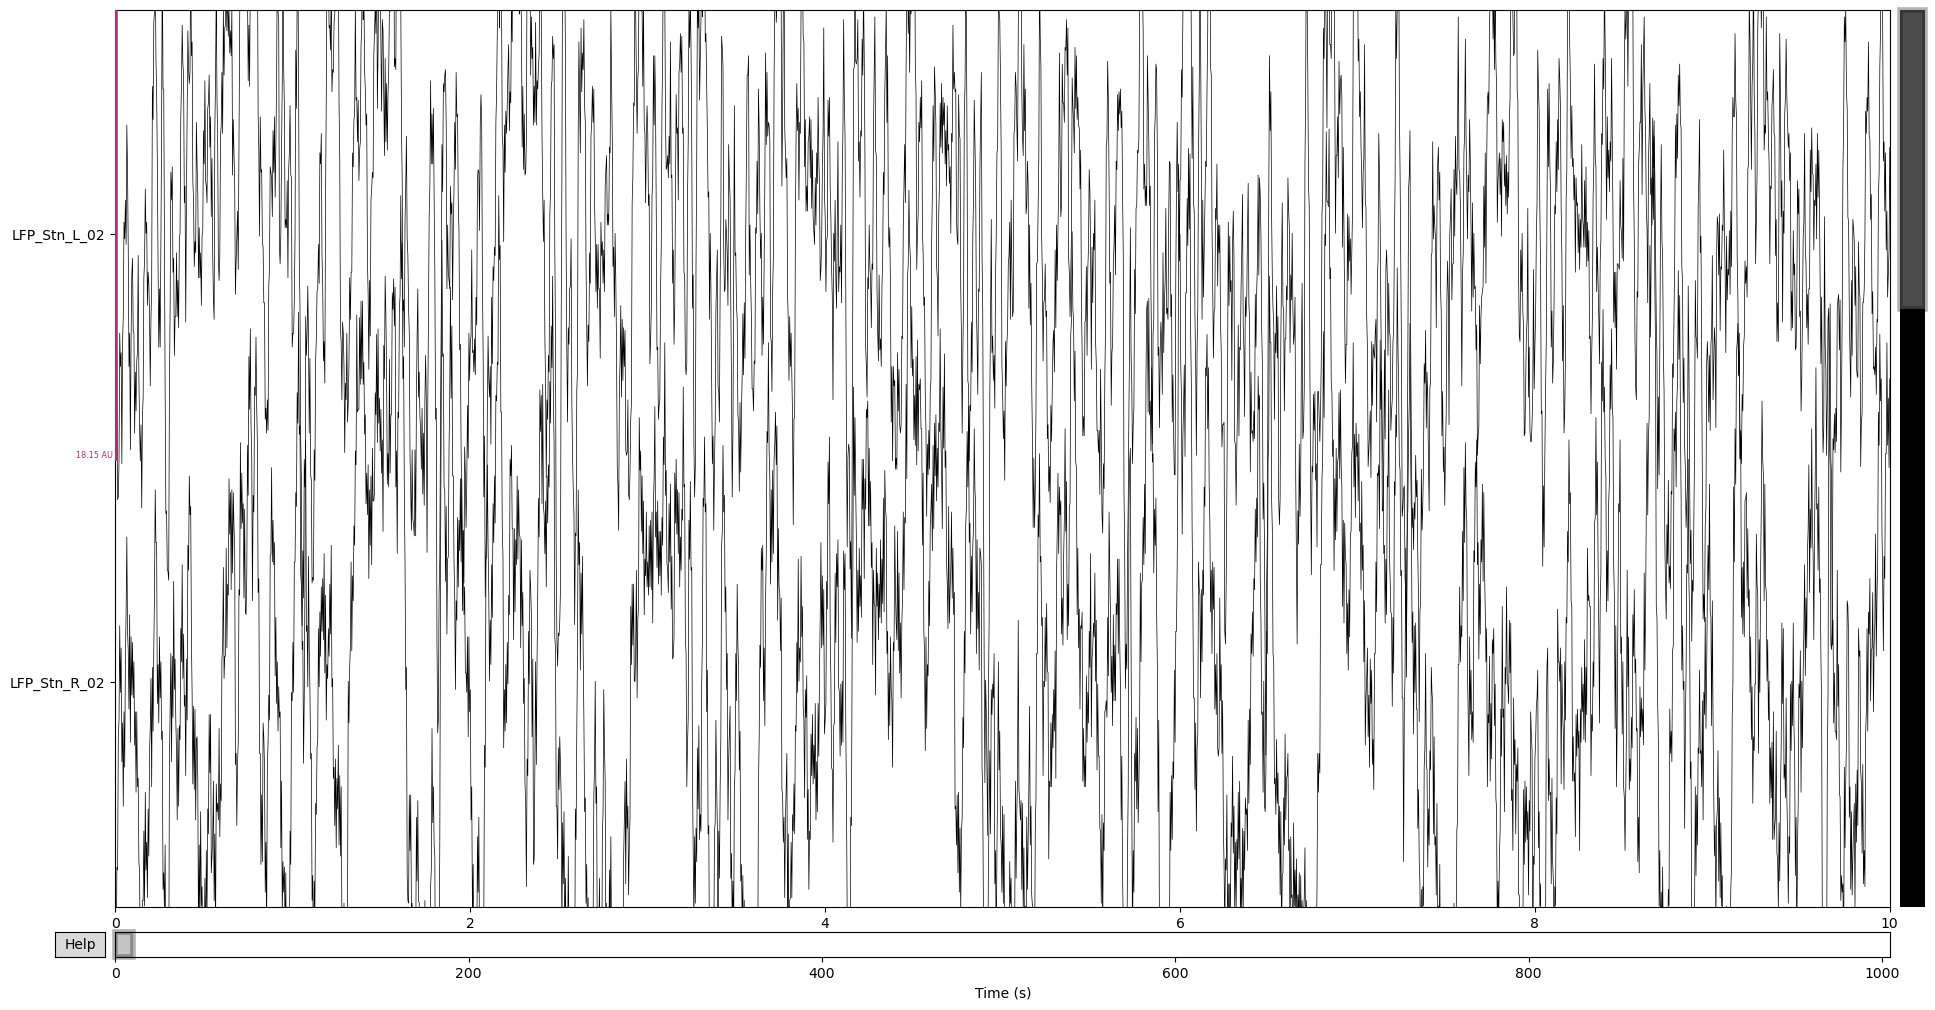

Channels marked as bad:
none


In [86]:
raw.plot(n_channels = 2)

In [87]:
#First time making them
interactive_annot = raw.annotations
raw.annotations.save('Sub028_artefactsAnnotations.csv', 
    overwrite = True)

In [88]:
'''
my_annot = mne.Annotations(onset=new_onsets,  # in seconds
                           duration=interactive_annot.duration,  # in seconds, too
                           description=interactive_annot.description,
                           orig_time=raw.info['meas_date'])

reload(mat2fif)
%matplotlib qt
'''
new_raw = mat2fif.mat2fif(raw,interactive_annot)

Omitting 47902 of 251187 (19.07%) samples, retaining 203285 (80.93%) samples.
Creating RawArray with float64 data, n_channels=6, n_times=203285
    Range : 0 ... 203284 =      0.000 ...   813.136 secs
Ready.


Channels marked as bad:
none


In [89]:
fif_name = os.path.join(project_path, 'data','Fifs','without_med_FTG','Sub028'+'_ARTREJECT_FIF.fif')
print(fif_name)

C:Users\mathiopv\OneDrive - Charité - Universitätsmedizin Berlin\ENTRAINMENT_PROJECT\data\Fifs\without_med_FTG\Sub028_ARTREJECT_FIF.fif


In [90]:
reload(dat_preproc)
%matplotlib qt
matplotlib.rc('font', size=10)
x = raw.get_data(reject_by_annotation = 'omit',picks=[0,1])
raw = new_raw
win_samp = 250
noverlap = 0.5
window = hann(win_samp, sym=False)
f, t, Sxx = dat_preproc.fft_rawviz(raw, x, win_samp, noverlap)

Omitting 47902 of 251187 (19.07%) samples, retaining 203285 (80.93%) samples.


In [91]:
new_raw.save(fif_name)

Writing C:Users\mathiopv\OneDrive - Charité - Universitätsmedizin Berlin\ENTRAINMENT_PROJECT\data\Fifs\without_med_FTG\Sub028_ARTREJECT_FIF.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Closing C:Users\mathiopv\OneDrive - Charité - Universitätsmedizin Berlin\ENTRAINMENT_PROJECT\data\Fifs\without_med_FTG\Sub028_ARTREJECT_FIF.fif
[done]


C:\Users\mathiopv\AppData\Local\Temp\ipykernel_8284\3671410624.py:1: RuntimeWarning: This filename (C:Users\mathiopv\OneDrive - Charité - Universitätsmedizin Berlin\ENTRAINMENT_PROJECT\data\Fifs\without_med_FTG\Sub028_ARTREJECT_FIF.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  new_raw.save(fif_name)


In [92]:
fft_name = str(subID)+'_FFT'
print(fft_name)

Sub028_FFT


In [93]:
#Saving the figures & files
fft_fig = os.path.join(project_path, 'figures','FFTs','without_med_FTG/')
fft_file = os.path.join(project_path, 'data','FFTs','without_med_FTG/')

plt.savefig(str(fft_fig)+str(fft_name)+'_ARTREJECTED',dpi = 300)

np.save(str(fft_file)+str(fft_name)+'_ARTREJECTED.npy',Sxx)

In [ ]:
#Saving the raw data as a fif file
raw2 = raw.copy()
Draw = raw2.get_data()
info = raw.info
new_raw = mne.io.RawArray(Draw, info)

fif_name = os.path.join(project_path, 'data','switching_freqs','Sub050/',str(subID)+'_FIF_145.fif')
new_raw.save(fif_name, overwrite = True)


In [ ]:
#Zscore Normalization of raw data & plot of new figure
reload(baseline_correction)
data = Sxx
t = t
baseline = (None, None)
raw = raw
stim_ch = 1
bs_data = baseline_correction.baseline_corr(data, t, baseline, raw = raw, stim_ch = 4)

In [ ]:
fft_fig = os.path.join(project_path, 'figures','FFts','test/')
fft_file = os.path.join(project_path, 'data','FFTs','test/')

plt.savefig(str(fft_fig)+str(fft_name)+'_zscored',dpi = 300)
np.save(str(fft_file)+str(fft_name)+'_zscored'+'.npy',bs_data)

In [ ]:
d = {'onset': [1, 500, 778],
    'duration': [30, 30, 10],
    'description': ['StimOff','StimOn','Rebound']
}

epoch_df = pd.DataFrame(data = d)
print(epoch_df)

In [ ]:
## Print Power Spectra with Raw Data
reload(dat_preproc)
filt_dat = raw.get_data()
time_onsets = epoch_df
window = 250
noverlap = 0.5
ylim2 = 0.4

fig = plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
title1 = str(subID)+ '_LSTN'
ps1 = dat_preproc.epoch_ps(filt_dat, time_onsets, window, noverlap, 0, 0.3, title1)

plt.subplot(1,2,2)
title2 = str(subID)+ '_RSTN'
ps2 = dat_preproc.epoch_ps(filt_dat, time_onsets, window, noverlap, 1, 0.2, title2)

plt.show()

In [ ]:
## Printing the Power Spectra (RAW)
ps_all = np.concatenate((ps1,ps2), axis = 0)
ps_df = pd.DataFrame(np.transpose(ps_all),
    columns = ['StimOff_LSTN','StimOn_LSTN','Rebound_LSTN',
    'StimOff_RSTN','StimOn_RSTN','Rebound_RSTN'],
    )
print(ps_df)

In [ ]:
#Saving the figures & files
fft_fig = os.path.join(project_path, 'figures','Power_Spectra','without_med_FTG/')
fft_file = os.path.join(project_path, 'data','power_spectra','without_med_FTG/')

plt.savefig(str(fft_fig)+str(fft_name)+'_PS',dpi = 150)
ps_df.to_csv(str(fft_file)+str(fft_name)+'_PS.csv')

In [ ]:
## Print Power Spectra with Zscored Data
fig, axes = plt.subplots(1,1, figsize = (8,6))

side = 0

ps_m1s0 = np.mean(bs_data[side,:,epoch_df.onset[0]:epoch_df.onset[0]+ epoch_df.duration[0]],1)
ps_m1s1 = np.mean(bs_data[side,:,epoch_df.onset[1]:epoch_df.onset[1]+ epoch_df.duration[1]],1)
ps_reb = np.mean(bs_data[side,:,epoch_df.onset[2]:epoch_df.onset[2]+ epoch_df.duration[2]],1)

plt.plot(np.arange(1,127),ps_m1s0,label = epoch_df.description[0])
plt.plot(np.arange(1,127),ps_m1s1,label = epoch_df.description[1])
plt.plot(np.arange(1,127),ps_reb,label = epoch_df.description[2])
    
plt.xlim(60,90)
plt.xlabel('Frequency [Hz]')
plt.ylabel('LFP Power (z-scored)')
    
plt.legend()
plt.show()


In [ ]:
ps_allzscored_df = pd.DataFrame(
    {
        'Spontan': ps_m1s0,
        'StimOn': ps_m1s1,
        'Rebound': ps_reb
    }
)
print(ps_allzscored_df)

In [ ]:
plt.savefig(str(fft_fig)+str(fft_name)+'_Contra_zscoredPS',dpi = 150)
ps_allzscored_df.to_csv(str(fft_file)+str(fft_name)+'_Contra_zscoredPS.csv')

### Checking Spectral Width

In [ ]:
#Import the power spectrum csv
ps_tbl = pd.read_csv(os.path.join(
    project_path,
        'data',
        'power_spectra',
        'test',
        'Sub045_FFT_PS.csv'
))

subID = 'Sub045'

x1 = ps_tbl.StimOff_LSTN[50:101]
x2 = ps_tbl.StimOn_LSTN[50:101]
plt.plot(np.arange(0,51),x1)
plt.plot(np.arange(0,51),x2)
plt.xticks(np.arange(0,51,10), labels = np.arange(50,101,10))

plt.ylim(0,0.4)

In [ ]:
reload(power_spectrum)
%matplotlib qt

height = 0.04

peaks1, results_half1, peaks2, results_half2 = power_spectrum.powerSpectrum_width(x1, x2, height, subID)
print(results_half1)
print(results_half2)

In [ ]:
plt.savefig(os.path.join(
    project_path,
    'figures',
    'Power_Spectra',
    'test',
    str(subID)+'_PSWidth'
),
dpi = 150)

### Average all Power Spectra and Plot them

In [ ]:
## Interpolate and plot power spectrum
trial_ps = pd.read_csv(os.path.join(
    project_path,
        'data',
        'power_spectra',
        'test',
        'Sub005_FFT_PS.csv'
)
)

print(trial_ps)

In [ ]:
reload(dat_preproc)
dat_preproc.mypower(trial_ps['StimOff_RSTN'])
dat_preproc.mypower(trial_ps['StimOn_RSTN'])
plt.xlim(50,100)

In [ ]:
os.path.join(
   project_path,
   'data', 'power_spectra', 'test'
)

In [ ]:
print(filename)

In [ ]:
#loop through all csv files in ZSCORED
from scipy import stats
all_spontan = []
all_subh = []
col_names = []

ps_path = os.path.join(
   project_path,
   'data', 'power_spectra', 'with_med_FTG'
)

'''
for filename in os.listdir(ps_path):
   if filename.endswith('FFT_Ipsi_zscoredPS.csv'):
   #with open(os.path.join(ps_path, filename), 'r') as f: # open in readonly mode
      this_df = pd.read_csv(os.path.join(ps_path,filename))
      this_spontan = this_df['Spontan']
      this_subh = this_df['StimOn']


      all_spontan.append(this_spontan)
      all_subh.append(this_subh)

'''

for filename in os.listdir(ps_path):
   if filename.endswith('FFT_PS.csv'):
      if filename.startswith('Sub006') or filename.startswith('Sub045'):
   #with open(os.path.join(ps_path, filename), 'r') as f: # open in readonly mode
         this_df = pd.read_csv(os.path.join(ps_path,filename))
         #this_spontan = this_df['StimOff_LSTN']
         this_subh = this_df['StimOn_LSTN']
      else: 
         this_df = pd.read_csv(os.path.join(ps_path,filename))
         #this_spontan = this_df['StimOff_RSTN']
         this_subh = this_df['StimOn_RSTN']
      sub_id = filename.split('_')[0]
   #all_spontan.append(this_spontan)
   all_subh.append(this_subh)
   col_names.append(sub_id)


In [ ]:
#all_spontan_med = pd.DataFrame(np.transpose(all_spontan))
all_subh_df = pd.DataFrame(np.transpose(all_subh))
all_subh_df.columns = col_names
print(all_subh_df)

In [ ]:
all_subh_df.to_excel(os.path.join(
    project_path,
   'data', 'power_spectra',
   'SubharmPS_with.xlsx'
))

Plot only the subharmonics and color code the Power Spectra

In [ ]:
#### IMPORT THEM ####
ps_path = 'data//power_spectra//'

df_without = pd.read_excel(os.path.join(
    project_path,
    ps_path,
    'SubharmPS_without.xlsx'
))

df_with = pd.read_excel(os.path.join(
    project_path,
    ps_path,
    'SubharmPS_with.xlsx'
))

all_subharms = [df_without, df_with]
all_subharms = pd.concat(all_subharms, axis = 1)

'''
#### SAVE IT ###
all_subharms.to_excel(os.path.join(
    project_path,
   'data', 'power_spectra',
   'All_Subharmonics62_PS.xlsx'
))
'''

In [ ]:
#### PLOT THE PS TOGETHER AND COLOR CODE THE DIFFERENT STIM FREQS ####
%matplotlib qt
colDict = {}
legend_dict = {}
for key in ['Sub007', 'Sub005', 'Sub006','Sub009','Sub014']:
    colDict[key] = 130
for key in ['Sub021', 'Sub025','Sub028','Sub033','Sub043','Sub050','Sub017','Sub045']:
    colDict[key] = 125

handles = []
labels = []

for col in all_subharms.columns:
    if col in colDict and colDict[col] == 130:
        line, = plt.plot(all_subharms[col], color='midnightblue')
        if 'Stim 130Hz' not in labels:
            handles.append(line)
            labels.append('Stim 130Hz')
    elif col in colDict and colDict[col] == 125:
        line, = plt.plot(all_subharms[col], color='crimson')
        if 'Stim 125Hz' not in labels:
            handles.append(line)
            labels.append('Stim 125Hz')
    else:
        plt.plot(all_subharms[col])

# Add labels and legend
plt.ylabel('LFP Power')
plt.xlabel('Frequency [Hz]')

plt.legend(handles, labels)

plt.xlim(50,90)
plt.ylim(0,0.5)

In [ ]:
plt.savefig(os.path.join(
    project_path,
    'figures',
    'Power_Spectra',
    'All_Subharmonics_PS'
),
dpi = 200)

plt.savefig(os.path.join(
    project_path,
    'figures',
    'Power_Spectra',
    'All_Subharmonics_PS.svg'
))

In [ ]:
%matplotlib qt
plt.plot(all_spontan_df,color = '#1f77b4',lw = 1, alpha = 1, label = 'Med On-Stim Off')
plt.plot(all_subh_df,color = 'red',lw = 1, alpha = 1, label = 'Med On-Stim On')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlim(50,90)
plt.ylim(0,0.25)
plt.xlabel('Frequency [Hz]')
plt.ylabel('LFP Power')

In [ ]:
plt.savefig(os.path.join(
    project_path,
    'figures',
    'Power_Spectra',
    'without_med_FTG',
    'AllSub_Ipsi_PowerSpectra'
),
dpi = 200)

In [ ]:
all_psSpontan = pd.read_csv(os.path.join(
    project_path,
        'results',
        'AllSpontan_PsZscored.csv'
))


all_psSubharm = pd.read_csv(os.path.join(
    project_path,
        'results',
        'AllSubharm_PsZscored.csv'
))

In [ ]:
all_psSpontan = all_psSpontan.drop('Sub029', axis=1)

In [ ]:
all_ps_mean1 = np.mean(all_psSpontan,1)
all_ps_sem1 = stats.sem(all_psSpontan,1)

all_ps_mean2 = np.mean(all_psSubharm,1)
all_ps_sem2 = stats.sem(all_psSubharm,1)

In [ ]:
plt.plot(np.arange(1,127), all_ps_mean1, label = 'Spontaneous FTG')
plt.fill_between(np.arange(1,127), all_ps_mean1-all_ps_sem1, all_ps_mean1+all_ps_sem1, alpha = 0.2)

plt.plot(np.arange(1,127), all_ps_mean2, label = 'DBS-Induced FTG')
plt.fill_between(np.arange(1,127), all_ps_mean2-all_ps_sem2, all_ps_mean2+all_ps_sem2, alpha = 0.2)

plt.xlim(50, 100)
plt.ylim(-0.4, 2)
plt.legend()

plt.xlabel('Frequency [Hz]')
plt.ylabel('LFP Power [z-scored]')
plt.title('Averaged Power Spectra [N = 6]')

In [ ]:
plt.savefig(os.path.join(
    project_path,
    'results',
    'Avg_PS'
),
dpi = 200)

In [ ]:
###Compare Power Spectra Widths

widths_tbl = pd.read_csv(os.path.join(
    project_path,
    'results',
    'PS_Widths.csv'
))
print(widths_tbl)

In [ ]:
import mlxtend
import seaborn as sns

In [ ]:
widths_all = np.concatenate((widths_tbl['WidthMed'],widths_tbl['WidthSubh']), axis = 0)
val_all = np.concatenate((np.repeat(0,7), np.repeat(1,7)), axis = 0)
widths_dict = {
    'widths': widths_all,
    'conds': val_all,
    'paired':[1,2,3,4,5,6,7,1,2,3,4,5,6,7]
}

df1=pd.DataFrame.from_dict(widths_dict)
print(df1)

In [ ]:
%matplotlib qt
ax = sns.boxplot(x='conds',y='widths',data=df1, boxprops=dict(alpha=.8), width = 0.3)
sns.stripplot(data=df1, x='conds',y='widths', jitter = 0, size = 10, edgecolor = 'black')
sns.lineplot(
    data=df1, x='conds',y='widths', units = 'paired',
    color=".7", estimator=None, 
    linestyle=':'
)
ax.set_xticklabels({'M1S0','M1S1'})
ax.set_xlabel('')
ax.set_ylabel('Widths [Freq Bins]')
plt.text(0.9,2.4,'p = .015')
plt.rcParams.update({'font.size': 15})

In [ ]:
p_value = mlxtend.permutation_test(
    widths_tbl['WidthMed'], widths_tbl['WidthSubh'], paired=True, method="approximate", seed=0, num_rounds=100000
)

print(p_value)

In [ ]:
np.round(p_value,decimals = 3)

In [ ]:
plt.savefig(os.path.join(
    project_path,
    'results',
    'PS_Widths'
),
dpi = 200)

In [ ]:
cdrs_df = pd.read_excel(os.path.join(
    project_path,
    'results',
    'Trial_CDRSAll.xlsx'
))
print(cdrs_df)

In [ ]:
score1 = cdrs_df.loc[(cdrs_df['Laterality'] == 'Total') & (cdrs_df['Cond'] == 1),"cdrs_score"]
score2 = cdrs_df.loc[(cdrs_df['Laterality'] == 'Total') & (cdrs_df['Cond'] == 3),"cdrs_score"]

p_value = mlxtend.permutation_test(
    np.array(score1), np.array(score2), paired=True, method="approximate", seed=0, num_rounds=100000
)

print(p_value)

In [ ]:
%matplotlib qt
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(x='Cond',y='cdrs_score',hue = 'Laterality', palette = ['m','g'], data=cdrs_df, width = 0.7)
sns.stripplot(data=cdrs_df, x='Cond',y='cdrs_score',hue = 'Laterality', jitter = False, size = 10, dodge = True, palette = ['#7E1E9C','#054907'])
sns.lineplot(
    data=cdrs_df, x=cdrs_df['Cond']-1, y='cdrs_score', units= 'SubCode', hue = 'Laterality',
    color=".3",
    palette=['m','g'],
    linestyle=':', estimator = None
)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2])
ax.set_ylim(-2,15)

ax.set_xlabel('')
ax.set_xticklabels(['M1S0','M1S1-PreSub','M1S1-Sub'])
ax.set_ylabel('CDRS Score')


In [ ]:
plt.savefig(os.path.join(
    project_path,
    'results',
    'CDRS_boxplot'
),
dpi = 200)

### Stim Parameters

In [ ]:
stim_pars = pd.read_excel(os.path.join(
    project_path,
    'results',
    'Amplitude_Dependent\\',
    'Stim_pars.xlsx'
))
print(stim_pars)

In [ ]:
%matplotlib qt

fig, ax = plt.subplots()

for i, row in stim_pars.iterrows():
    if row['Cohort'] == 1:
        ax.plot([row['StartAmp'], row['EndAmp']], [row['Index_AA']-1, row['Index_AA']-1], color='blue')
        ax.plot(row['StartAmp'], row['Index_AA']-1, '|', color='blue', mew = 2)
        ax.plot(row['EndAmp'], row['Index_AA']-1, '|', color='blue', mew = 2)
    else:
        ax.plot([row['StartAmp'], row['EndAmp']], [row['Index_AA']-1, row['Index_AA']-1], color='orange')
        ax.plot(row['StartAmp'], row['Index_AA']-1, '|', color='orange', mew = 2)
        ax.plot(row['EndAmp'], row['Index_AA']-1, '|', color='orange', mew = 2)

ax.plot(stim_pars['ClinicalAmp'], stim_pars['Index_AA']-1, '*', color='green', label='Clinical Amplitude', markersize = 8)
ax.plot(stim_pars['HighestAmp'], stim_pars['Index_AA']-1, '|', color='magenta', label='Highest Amplitude', markersize = 10)

ax.set_xlim(0,4)
ax.set_yticks(np.arange(0,14))
yticklabels = ['#{}'.format(i) for i in np.arange(1,15)]

ax.set_yticklabels(yticklabels)
ax.legend(loc = 'lower left')
ax.set_xlabel('Stimulation Amplitude [mA]')
ax.set_ylabel('STN')

In [ ]:
plt.savefig(os.path.join(
    project_path,
    'results',
    'Amplitude_Dependent',
    'Stim_PARS'
),
dpi = 200)

plt.savefig(os.path.join(
    project_path,
    'results',
    'Amplitude_Dependent',
    'Stim_PARS.svg'
))